In [ ]:
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
# LAB MODULE 3.
# Climate models
#~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# Topics covered:
# (1) netCDF file format / raster data
# (2) Visualization
# (3) Re-gridding
# (4) Multi-model ensembles

# We will work with datasets from CMIP6 archive; in the examples I will use the following cases:
#  ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc
#  ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc
#  ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-194912.nc
#  ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc

# You can download them either from the link provided in the slides, 
# or from the shared google drive link (login with your UNIMIB credentials only):
#  https://esgf-node.llnl.gov/search/cmip6/
#  https://drive.google.com/file/d/1ZEtDFYKhS_CEeYFzoe23vpDCIqR61bm5/view?usp=sharing


# ci siamo concentrati sui dati raster in aprticolare quelli prodotti da simulazioni con modelli climatici su scala globale

# le multi model ensemble sono esperimenti fatti con diversi modelli climatici che restituiscono diversi output

In [1]:
# Exercise 4
# Multi-model ensemble

# si considerano 3 simualzioni per la variabile temperatura superficiale e focalizzarsi sulla serie temporale delle anomalie di temperatura media globali.


# Now let's consider 3 model simulations of surface temperatures for the historical period 1850-2014, 
#  in particular the time series of global average annual temperature anomalies.
#
# Plot the multi-model ensemble average surface temperature time series (mean and standera deviation), 
#  and compare with the corresponding time series from observations (see Module 2).

# Very useful link:
# https://xarray.pydata.org/en/stable/gallery.html
# https://xarray.pydata.org/en/stable/examples/weather-data.html#calculate-monthly-anomalies

In [3]:
# Import libraries

import matplotlib.pyplot as plt
import matplotlib as mpl

import cartopy.crs as ccrs
#from cartopy.util import add_cyclic_point

import xarray as xr
import nc_time_axis

import numpy as np
import datetime

In [4]:
#- Open & explore the netCDF file for model 1; extract model name

modfile1='./ts_Amon_IPSL-CM6A-LR_historical_r1i1p1f1_gr_185001-201412.nc'
#modfile1='./ts_Amon_MRI-ESM2-0_historical_r1i1p1f1_gn_185001-201412.nc'

m_variable='./ts_Amon_'
m_case='_historical_r1i1p1f1_gr_185001-201412.nc'
model1=modfile1[len(m_variable):-len(m_case)]

d1 = xr.open_dataset(modfile1)
d1

# c'è una griglia 143 * 144 con 1980 elementi sull'asse del tempo (mesi)

<xarray.Dataset>
Dimensions:      (axis_nbounds: 2, lat: 143, lon: 144, time: 1980)
Coordinates:
  * lat          (lat) float32 -90.0 -88.73239 -87.46479 ... 88.73239 90.0
  * lon          (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time         (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:...
Dimensions without coordinates: axis_nbounds
Data variables:
    time_bounds  (time, axis_nbounds) datetime64[ns] ...
    ts           (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    creation_date:          2018-07-11T07:36:33Z
    tracking_id:            hdl:21.14100/3168f5b1-bf0a-4aec-931f-73c9d0034a45
    description:            CMIP6 historical
    title:                  IPSL-CM6A-LR model output prepared for CMIP6 / CM...
    activity_id:            CMIP
    contact:                ipsl-cmip6@listes.ipsl.fr
    data_specs_version:     01.00.21
    dr2xml_version:         1.11
    experiment_id:          historical
    experiment:             all-forcing simulation of the recent past
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    grid:                   LMDZ grid
    grid_label:             gr
    nominal_resolution:     250 km
    initialization_index:   1
    institution_id:         IPSL
    institution:            Institut Pierre Simon Laplace, Paris 75252, France
    license:                CMIP6 model data produced by IPSL is licensed und...
    mip_era:                CMIP6
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_activity_id:     CMIP
    parent_source_id:       IPSL-CM6A-LR
    parent_time_units:      days since 1850-01-01 00:00:00
    branch_method:          standard
    branch_time_in_parent:  21914.0
    branch_time_in_child:   0.0
    physics_index:          1
    product:                model-output
    realm:                  atmos
    source:                 IPSL-CM6A-LR (2017):  atmos: LMDZ (NPv6, N96; 144...
    source_id:              IPSL-CM6A-LR
    source_type:            AOGCM BGC
    sub_experiment_id:      none
    sub_experiment:         none
    table_id:               Amon
    variable_id:            ts
    EXPID:                  historical
    CMIP6_CV_version:       cv=6.2.3.5-2-g63b123e
    dr2xml_md5sum:          f1e40c1fc5d8281f865f72fbf4e38f9d
    model_version:          6.1.5
    parent_variant_label:   r1i1p1f1
    name:                   /ccc/work/cont003/gencmip6/p86caub/IGCM_OUT/IPSLC...
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.IPSL.IPSL-CM...
    variant_label:          r1i1p1f1
    realization_index:      1
    history:                Sat Dec  1 12:17:27 2018: ncatted -O -a realizati...
    NCO:                    "4.6.0"

In [5]:
#- Open & explore the netCDF file for model 2; extract model name

modfile2='./ts_Amon_ACCESS-ESM1-5_historical_r1i1p1f1_gn_185001-201412.nc'

model2=modfile2[len(m_variable):-len(m_case)]

d2 = xr.open_dataset(modfile2)
d2

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 145, lon: 192, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -90.0 -88.75 -87.5 -86.25 ... 86.25 87.5 88.75 90.0
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  21915.0
    creation_date:          2019-11-15T03:52:25Z
    data_specs_version:     01.00.30
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.CSIRO.ACCESS...
    grid:                   native atmosphere N96 grid (145x192 latxlon)
    grid_label:             gn
    history:                2019-11-15T03:52:25Z ; CMOR rewrote data to be co...
    initialization_index:   1
    institution:            Commonwealth Scientific and Industrial Research O...
    institution_id:         CSIRO
    mip_era:                CMIP6
    nominal_resolution:     250 km
    notes:                  Exp: ESM-historical; Local ID: HI-05; Variable: t...
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       ACCESS-ESM1-5
    parent_time_units:      days since 0101-1-1
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    run_variant:            forcing: GHG, Oz, SA, Sl, Vl, BC, OC, (GHG = CO2,...
    source:                 ACCESS-ESM1.5 (2019): \naerosol: CLASSIC (v1.0)\n...
    source_id:              ACCESS-ESM1-5
    source_type:            AOGCM
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(30 April 2019) MD5:e14f55f257cceaf...
    title:                  ACCESS-ESM1-5 output prepared for CMIP6
    variable_id:            ts
    variant_label:          r1i1p1f1
    version:                v20191115
    cmor_version:           3.4.0
    tracking_id:            hdl:21.14100/0b38948e-85f7-4726-8f0b-291088a1cbef
    license:                CMIP6 model data produced by CSIRO is licensed un...

In [6]:
#- Open & explore the netCDF file for model 3; extract model name

modfile3='./ts_Amon_MIROC6_historical_r1i1p1f1_gn_185001-201412.nc'

model3=modfile3[len(m_variable):-len(m_case)]

d3 = xr.open_dataset(modfile3)
d3

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 128, lon: 256, time: 1980)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
  * lat        (lat) float64 -88.93 -87.54 -86.14 -84.74 ... 86.14 87.54 88.93
  * lon        (lon) float64 0.0 1.406 2.812 4.219 ... 354.4 355.8 357.2 358.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    ts         (time, lat, lon) float32 ...
Attributes:
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   0.0
    branch_time_in_parent:  0.0
    creation_date:          2018-11-30T16:15:09Z
    data_specs_version:     01.00.28
    experiment:             all-forcing simulation of the recent past
    experiment_id:          historical
    external_variables:     areacella
    forcing_index:          1
    frequency:              mon
    further_info_url:       https://furtherinfo.es-doc.org/CMIP6.MIROC.MIROC6...
    grid:                   native atmosphere T85 Gaussian grid
    grid_label:             gn
    history:                Thu Mar 21 11:28:13 2019: ncrcat ts_Amon_MIROC6_h...
    initialization_index:   1
    institution:            JAMSTEC (Japan Agency for Marine-Earth Science an...
    institution_id:         MIROC
    mip_era:                CMIP6
    nominal_resolution:     250 km
    parent_activity_id:     CMIP
    parent_experiment_id:   piControl
    parent_mip_era:         CMIP6
    parent_source_id:       MIROC6
    parent_time_units:      days since 3200-1-1
    parent_variant_label:   r1i1p1f1
    physics_index:          1
    product:                model-output
    realization_index:      1
    realm:                  atmos
    source:                 MIROC6 (2017): \naerosol: SPRINTARS6.0\natmos: CC...
    source_id:              MIROC6
    source_type:            AOGCM AER
    sub_experiment:         none
    sub_experiment_id:      none
    table_id:               Amon
    table_info:             Creation Date:(06 November 2018) MD5:0728c79344e0...
    title:                  MIROC6 output prepared for CMIP6
    variable_id:            ts
    variant_label:          r1i1p1f1
    license:                CMIP6 model data produced by MIROC is licensed un...
    cmor_version:           3.3.2
    tracking_id:            hdl:21.14100/24645cf7-2812-40bc-a320-cfc906678afe
    NCO:                    netCDF Operators version 4.7.6 (Homepage = http:/...

In [7]:
# First, we need climate normals for each grid cell for each model
# Second, we need to convert to temperature anomalies
# Third, we need to aggregate in space (global) and time (annual)
# Fourth, we can calculate the ensemble mean time series of global mean temperature anomalies

In [8]:
# First, we need climate normals for each grid cell for each model

n1=d1.ts.sel(time=slice("1961-01-16T12:00:00.000000000","1990-12-16T12:00:00.000000000")  # periodo di 30 anni
            ).groupby("time.month").mean()
n2=d2.ts.sel(time=slice("1961-01-16T12:00:00.000000000","1990-12-16T12:00:00.000000000")
            ).groupby("time.month").mean()
n3=d3.ts.sel(time=slice("1961-01-16T12:00:00.000000000","1990-12-16T12:00:00.000000000")
            ).groupby("time.month").mean()
n1

# come asse temporale ora abbaimo i 12 mesi

<xarray.DataArray 'ts' (month: 12, lat: 143, lon: 144)>
array([[[244.14044, 244.14044, 244.14044, ..., 244.14044, 244.14044,
         244.14044],
        [245.54716, 245.48807, 245.39162, ..., 245.779  , 245.69003,
         245.65794],
        [245.92537, 245.78987, 245.6456 , ..., 246.32675, 246.1931 ,
         246.07646],
        ...,
        [245.28096, 245.36476, 245.40202, ..., 245.07286, 245.1938 ,
         245.25284],
        [244.89565, 244.9313 , 244.94987, ..., 244.83107, 244.82858,
         244.83461],
        [243.43988, 243.43988, 243.43988, ..., 243.43988, 243.43988,
         243.43988]],

       [[232.13663, 232.13663, 232.13663, ..., 232.13663, 232.13663,
         232.13663],
        [234.24763, 234.1605 , 234.07266, ..., 234.49162, 234.40804,
         234.3569 ],
        [234.88359, 234.7139 , 234.53471, ..., 235.4312 , 235.2529 ,
         235.11736],
...
        [252.22047, 252.33818, 252.39545, ..., 251.95712, 252.10191,
         252.17915],
        [252.04184, 252.07846, 252.10356, ..., 251.95572, 251.95549,
         251.96661],
        [250.64558, 250.64558, 250.64558, ..., 250.64558, 250.64558,
         250.64558]],

       [[245.1475 , 245.1475 , 245.1475 , ..., 245.1475 , 245.1475 ,
         245.1475 ],
        [246.4527 , 246.40462, 246.319  , ..., 246.66818, 246.58694,
         246.5485 ],
        [246.78603, 246.66106, 246.53146, ..., 247.15549, 247.03365,
         246.92548],
        ...,
        [247.90839, 248.01718, 248.06566, ..., 247.7069 , 247.8121 ,
         247.87064],
        [247.7844 , 247.83588, 247.86969, ..., 247.70439, 247.70482,
         247.71436],
        [246.63382, 246.63382, 246.63382, ..., 246.63382, 246.63382,
         246.63382]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [9]:
# Second, we need to convert to temperature anomalies

anom1 = d1.ts.groupby("time.month") - n1  # sottraiamo la temperatura media del mese corrisponendete
anom2 = d2.ts.groupby("time.month") - n2
anom3 = d3.ts.groupby("time.month") - n3

anom1

# ora abbiamo valori ad occhio centrati intorno allo zero

<xarray.DataArray 'ts' (time: 1980, lat: 143, lon: 144)>
array([[[-0.03617859, -0.03617859, -0.03617859, ..., -0.03617859,
         -0.03617859, -0.03617859],
        [ 0.32928467,  0.33947754,  0.383255  , ...,  0.30236816,
          0.3470459 ,  0.3289795 ],
        [ 0.34701538,  0.37309265,  0.34599304, ...,  0.33592224,
          0.35472107,  0.34191895],
        ...,
        [-3.80365   , -3.7616882 , -3.824768  , ..., -3.799057  ,
         -3.8373108 , -3.8202362 ],
        [-4.044876  , -4.0893097 , -4.130768  , ..., -4.025131  ,
         -4.0332184 , -4.039551  ],
        [-4.5410156 , -4.5410156 , -4.5410156 , ..., -4.5410156 ,
         -4.5410156 , -4.5410156 ]],

       [[ 3.9029083 ,  3.9029083 ,  3.9029083 , ...,  3.9029083 ,
          3.9029083 ,  3.9029083 ],
        [ 4.46817   ,  4.4261627 ,  4.5011444 , ...,  4.290985  ,
          4.402176  ,  4.4121094 ],
        [ 4.1072235 ,  4.1075287 ,  4.150696  , ...,  4.0816956 ,
          4.0272827 ,  4.097824  ],
...
        [ 5.5145416 ,  5.6132965 ,  5.7563477 , ...,  4.9910583 ,
          5.2514496 ,  5.4482574 ],
        [ 5.0813293 ,  5.221863  ,  5.314743  , ...,  4.853546  ,
          4.860733  ,  4.893097  ],
        [ 4.804062  ,  4.804062  ,  4.804062  , ...,  4.804062  ,
          4.804062  ,  4.804062  ]],

       [[-1.1948242 , -1.1948242 , -1.1948242 , ..., -1.1948242 ,
         -1.1948242 , -1.1948242 ],
        [-1.1982574 , -1.1947784 , -1.2141571 , ..., -1.1946564 ,
         -1.1908569 , -1.1939087 ],
        [-1.1338959 , -1.1549377 , -1.1487427 , ..., -1.1196594 ,
         -1.1152191 , -1.1341705 ],
        ...,
        [ 8.092133  ,  8.011017  ,  7.8975525 , ...,  8.326279  ,
          8.244354  ,  8.16153   ],
        [ 7.0609894 ,  6.964859  ,  6.8751373 , ...,  7.181015  ,
          7.1661987 ,  7.1422424 ],
        [ 5.243225  ,  5.243225  ,  5.243225  , ...,  5.243225  ,
          5.243225  ,  5.243225  ]]], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
  * time     (time) datetime64[ns] 1850-01-16T12:00:00 ... 2014-12-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [10]:
# Third, we need to aggregate in space (global) and time (annual dato che per ora abbiamo una risoluzione mensile)

In [11]:
# per fare l'aggregazione spaziale è importante considerare che su uan griglia lat e long le aeree delle celle sono diverse, tendono a diminuire verso i poli. Risulta dunque necessario effettuare una media pesata con i pesi che siano proporzionali alle aree delle celle. Si può usare ad esempio la funzione coseno per creare questi pesi

# Get the weights for an area-weighted average
# ottengo una serie di pesi che sono deifniti per ciascuna banda di latitudine
# il primo peso infatti è molto piccolo, siamo vicini ad un polo, e poi verso l'equatore diventano più grandi

weights1 = np.cos(np.deg2rad(d1.lat))
weights2 = np.cos(np.deg2rad(d2.lat))
weights3 = np.cos(np.deg2rad(d3.lat))

weights1

# le osservazioni nel mod 2 non avevano considerato la pesatura delle aeree, si potrebbe rifare volendo

# qui io non ho fatto questo passaggio

<xarray.DataArray 'lat' (lat: 143)>
array([-4.3711388e-08,  2.2122204e-02,  4.4233385e-02,  6.6323034e-02,
        8.8380106e-02,  1.1039404e-01,  1.3235393e-01,  1.5424894e-01,
        1.7606856e-01,  1.9780189e-01,  2.1943852e-01,  2.4096775e-01,
        2.6237893e-01,  2.8366181e-01,  3.0480573e-01,  3.2580057e-01,
        3.4663594e-01,  3.6730155e-01,  3.8778749e-01,  4.0808365e-01,
        4.2817995e-01,  4.4806677e-01,  4.6773431e-01,  4.8717287e-01,
        5.0637293e-01,  5.2532524e-01,  5.4402035e-01,  5.6244934e-01,
        5.8060288e-01,  5.9847230e-01,  6.1604881e-01,  6.3332385e-01,
        6.5028882e-01,  6.6693550e-01,  6.8325579e-01,  6.9924164e-01,
        7.1488535e-01,  7.3017913e-01,  7.4511546e-01,  7.5968707e-01,
        7.7388692e-01,  7.8770798e-01,  8.0114347e-01,  8.1418687e-01,
        8.2683176e-01,  8.3907199e-01,  8.5090148e-01,  8.6231458e-01,
        8.7330556e-01,  8.8386917e-01,  8.9400011e-01,  9.0369350e-01,
        9.1294456e-01,  9.2174882e-01,  9.3010193e-01,  9.3799978e-01,
        9.4543850e-01,  9.5241451e-01,  9.5892441e-01,  9.6496493e-01,
        9.7053313e-01,  9.7562635e-01,  9.8024201e-01,  9.8437792e-01,
        9.8803204e-01,  9.9120253e-01,  9.9388790e-01,  9.9608684e-01,
        9.9779820e-01,  9.9902123e-01,  9.9975526e-01,  1.0000000e+00,
        9.9975526e-01,  9.9902123e-01,  9.9779820e-01,  9.9608684e-01,
        9.9388790e-01,  9.9120253e-01,  9.8803204e-01,  9.8437792e-01,
        9.8024201e-01,  9.7562635e-01,  9.7053313e-01,  9.6496493e-01,
        9.5892441e-01,  9.5241451e-01,  9.4543850e-01,  9.3799978e-01,
        9.3010193e-01,  9.2174882e-01,  9.1294456e-01,  9.0369350e-01,
        8.9400011e-01,  8.8386917e-01,  8.7330556e-01,  8.6231458e-01,
        8.5090148e-01,  8.3907199e-01,  8.2683176e-01,  8.1418687e-01,
        8.0114347e-01,  7.8770798e-01,  7.7388692e-01,  7.5968707e-01,
        7.4511546e-01,  7.3017913e-01,  7.1488535e-01,  6.9924164e-01,
        6.8325579e-01,  6.6693550e-01,  6.5028882e-01,  6.3332385e-01,
        6.1604881e-01,  5.9847230e-01,  5.8060288e-01,  5.6244934e-01,
        5.4402035e-01,  5.2532524e-01,  5.0637293e-01,  4.8717287e-01,
        4.6773431e-01,  4.4806677e-01,  4.2817995e-01,  4.0808365e-01,
        3.8778749e-01,  3.6730155e-01,  3.4663594e-01,  3.2580057e-01,
        3.0480573e-01,  2.8366181e-01,  2.6237893e-01,  2.4096775e-01,
        2.1943852e-01,  1.9780189e-01,  1.7606856e-01,  1.5424894e-01,
        1.3235393e-01,  1.1039404e-01,  8.8380106e-02,  6.6323034e-02,
        4.4233385e-02,  2.2122204e-02, -4.3711388e-08], dtype=float32)
Coordinates:
  * lat      (lat) float32 -90.0 -88.73239 -87.46479 ... 87.46479 88.73239 90.0

In [12]:
# Aggregate globally using an area-weighted mean and resample taking the annual average

# non è necessario forse fare regridding tanto faccio prima un'aggregazione spaziale globale per ciascun modello, mi sarebbe servito regridding se avessi dovuto fare dei confronti prima, non a livello globale, tra i vari modelli. In questo caso invece i vari enstt1, enstt2 e enstt3 sono oramai a livello globale quindi il fatto di avere delle celle diverse non è più importante.

enst = xr.Dataset()
enst['ts1'] = anom1.weighted(weights1).mean(("lon", "lat"),keep_attrs=True).resample(time="Y").mean()  # media pesata su lat e long (passandolgi i pesi sopra calcolati) e al tempo stesso anche resampling su base annuale calcolando la media  - quindi con la prima media elimino le componenti lat e long calcolando una media
enst['ts2'] = anom2.weighted(weights2).mean(("lon", "lat")).resample(time="Y").mean()
enst['ts3'] = anom3.weighted(weights3).mean(("lon", "lat")).resample(time="Y").mean()
enst
# si un'unica dimensione, il tempo, 165 anni

<xarray.Dataset>
Dimensions:  (time: 165)
Coordinates:
  * time     (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    ts1      (time) float32 -0.75215775 -0.56572527 ... 0.7810393 0.6676673
    ts2      (time) float64 0.06645 -0.05005 -0.1243 ... 0.8821 0.9863 0.9607
    ts3      (time) float64 -0.2957 -0.3336 -0.3094 ... 0.4883 0.8411 0.7161

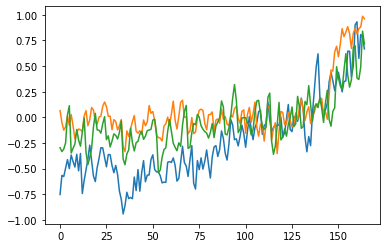

In [13]:
# Visulize the three time series

plt.plot(enst.ts1)
plt.plot(enst.ts2)
plt.plot(enst.ts3)


In [14]:
# Fourth, we can calculate the ensemble mean time series of global mean temperature anomalies

# Calculate the standard deviation of the 3 models

ens_mean = enst.to_array(dim='new').mean('new')
ens_std = enst.to_array(dim='new2').std('new2')

enst['ens_mean'] = ens_mean 
enst['ens_std'] = ens_std

enst


<xarray.Dataset>
Dimensions:   (time: 165)
Coordinates:
  * time      (time) datetime64[ns] 1850-12-31 1851-12-31 ... 2014-12-31
Data variables:
    ts1       (time) float32 -0.75215775 -0.56572527 ... 0.7810393 0.6676673
    ts2       (time) float64 0.06645 -0.05005 -0.1243 ... 0.8821 0.9863 0.9607
    ts3       (time) float64 -0.2957 -0.3336 -0.3094 ... 0.4883 0.8411 0.7161
    ens_mean  (time) float64 -0.3271 -0.3165 -0.337 ... 0.726 0.8695 0.7815
    ens_std   (time) float64 0.3349 0.2109 0.1859 ... 0.1708 0.08617 0.1283

In [15]:
# Plot & compare with globam mean surface temperature anomalies time series from Module 2

# Load data

import pandas as pd

obs = pd.read_csv('gmta_10295_stations')
obs = obs.set_index('time')
obs.index = pd.to_datetime(obs.index)

obs


,gmta
time,
1850-12-31,-0.564252
1851-12-31,-0.117734
1852-12-31,-0.329241
1853-12-31,-0.369994
1854-12-31,-0.060377
...,...
2014-12-31,0.963406
2015-12-31,1.020377
2016-12-31,1.453652


Text(0.5, 1.0, 'Global Mean Temperature Anomalies: \n Model ensemble vs observations')

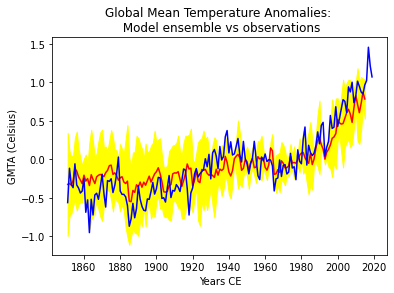

In [16]:
# Plot

plt.plot(enst.time, enst.ens_mean, color='red')
plt.fill_between(enst.time, enst.ens_mean-2*enst.ens_std, enst.ens_mean+2*enst.ens_std,color='yellow')
plt.plot(obs, color='blue')
plt.xlabel('Years CE')
plt.ylabel('GMTA (Celsius)')
plt.title('Global Mean Temperature Anomalies: \n Model ensemble vs observations')

# in blu le osservazioni

# possiamo dire che la nostra multi model ensemble ci permette di vedere come le simulazioni dei modelli ci permttono di ricostruire con buona approssimazione quelli che sono stati i trend delle temperature media globali annuali registarte dalle stazioni